## Занятие 8:
## Анимации. Библиотеки машинного обучения.

<ipython-input-22-41714c79b0e3>:17: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  rain_drops = np.zeros(n_drops, dtype=[('position', float, 2),


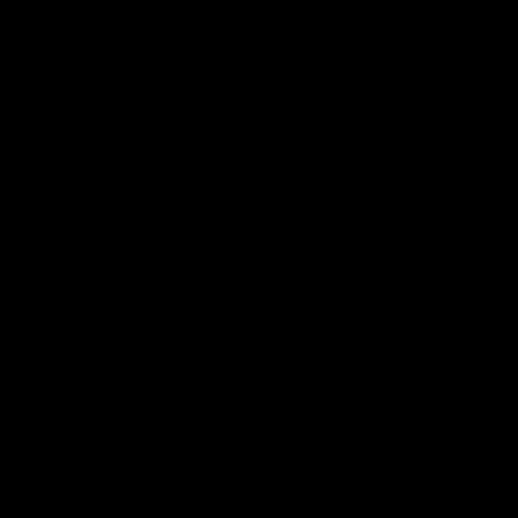

In [22]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

# Fixing random state for reproducibility
np.random.seed(19680801)


# Create new Figure and an Axes which fills it.
fig = plt.figure(figsize=(7, 7))
ax = fig.add_axes([0, 0, 1, 1], frameon=False)
ax.set_xlim(0, 1), ax.set_xticks([])
ax.set_ylim(0, 1), ax.set_yticks([])

# Create rain data
n_drops = 50
rain_drops = np.zeros(n_drops, dtype=[('position', float, 2),
                                      ('size',     float, 1),
                                      ('growth',   float, 1),
                                      ('color',    float, 4)])

# Initialize the raindrops in random positions and with
# random growth rates.
rain_drops['position'] = np.random.uniform(0, 1, (n_drops, 2))
rain_drops['growth'] = np.random.uniform(50, 200, n_drops)

# Construct the scatter which we will update during animation
# as the raindrops develop.
scat = ax.scatter(rain_drops['position'][:, 0], rain_drops['position'][:, 1],
                  s=rain_drops['size'], lw=0.5, edgecolors=rain_drops['color'],
                  facecolors='none')


def update(frame_number):
    # Get an index which we can use to re-spawn the oldest raindrop.
    current_index = frame_number % n_drops

    # Make all colors more transparent as time progresses.
    rain_drops['color'][:, 3] -= 1.0/len(rain_drops)
    rain_drops['color'][:, 3] = np.clip(rain_drops['color'][:, 3], 0, 1)

    # Make all circles bigger.
    rain_drops['size'] += rain_drops['growth']

    # Pick a new position for oldest rain drop, resetting its size,
    # color and growth factor.
    rain_drops['position'][current_index] = np.random.uniform(0, 1, 2)
    rain_drops['size'][current_index] = 5
    rain_drops['color'][current_index] = (0, 0, 0, 1)
    rain_drops['growth'][current_index] = np.random.uniform(50, 200)

    # Update the scatter collection, with the new colors, sizes and positions.
    scat.set_edgecolors(rain_drops['color'])
    scat.set_sizes(rain_drops['size'])
    scat.set_offsets(rain_drops['position'])


# Construct the animation, using the update function as the animation director.
animation = FuncAnimation(fig, update, interval=10)
plt.show()

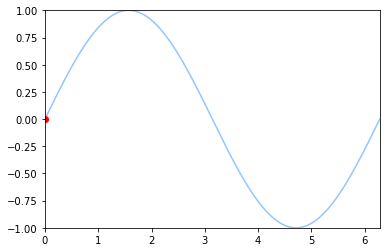

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
 
TWOPI = 2*np.pi
 
fig, ax = plt.subplots()
 
t = np.arange(0.0, TWOPI, 0.001)
s = np.sin(t)
l = plt.plot(t, s)
 
ax = plt.axis([0,TWOPI,-1,1])
 
redDot, = plt.plot([0], [np.sin(0)], 'ro')
 
def animate(i):
    redDot.set_data(i, np.sin(i))
    return redDot,
 
# create animation using the animate() function
myAnimation = animation.FuncAnimation(fig, animate, frames=np.arange(0.0, TWOPI, 0.1), \
                                      interval=10, blit=True, repeat=True)
 
plt.show()

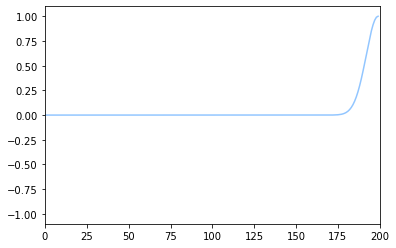

In [9]:
import time

import matplotlib.pyplot as plt
import numpy


def gaussian(x, delay, sigma):
    '''
    Функция, график которой будет отображаться процессе анимации
    '''
    return numpy.exp(-((x - delay) / sigma) ** 2)


if __name__ == '__main__':
    # Параметры отображаемой функции
    maxSize = 200
    sigma = 10.0

    # Диапазон точек для расчета графика функции
    x = numpy.arange(maxSize)

    # Значения графика функции
    y = numpy.zeros(maxSize)

    # !!! Включить интерактивный режим для анимации
    plt.ion()

    # У функции gaussian будет меняться параметр delay (задержка)
    for delay in numpy.arange(-50.0, 200.0, 1.0):
        y = gaussian(x, delay, sigma)

        # !!! Очистить текущую фигуру
        plt.clf()

        # Отобразить график
        plt.plot(x, y)

        # Установка отображаемых интервалов по осям
        plt.xlim(0, maxSize)
        plt.ylim(-1.1, 1.1)

        # !!! Следующие два вызова требуются для обновления графика
        plt.draw()
        plt.gcf().canvas.flush_events()

        # Задержка перед следующим обновлением
        time.sleep(0.02)

    # Отключить интерактивный режим по завершению анимации
    plt.ioff()

    # Нужно, чтобы график не закрывался после завершения анимации
    plt.show()

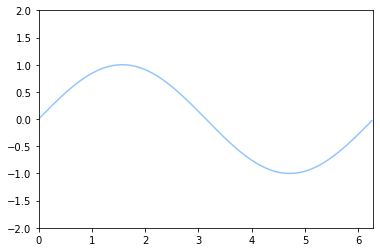

In [16]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import animation
import numpy as np


# время (200 точек)
t = np.linspace(0, 2 * np.pi, 200)
x = np.sin(t)  # синусоида

fig, ax = plt.subplots()
# пределы отображения
ax.axis([0, 2 * np.pi, -2, 2])
l, = ax.plot([], [])

def animate(i):
    # рисуем данные только от 0 до i
    # на первом кадре будет 0 точек, 
    # а на последнем - все
    l.set_data(t[:i], x[:i])
    
fps = 30  # карды в сек
# frames - число кадров анимации
ani = animation.FuncAnimation(fig, animate, frames=len(t), interval=1000.0 / fps)

def animate(i):
    x = np.sin(t - i / len(t) * np.pi * 2) * np.sin(t * 15)
    l.set_data(t, x)
    
ani.save('myAnimation.gif', writer='pillow', fps=30)

MovieWriter imagemagick unavailable; using Pillow instead.


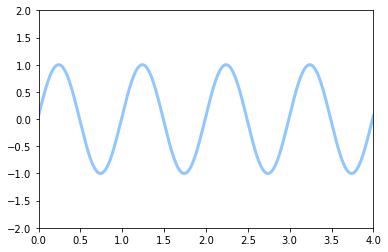

In [18]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.animation import FuncAnimation
plt.style.use('seaborn-pastel')
 
 
fig = plt.figure()
ax = plt.axes(xlim=(0, 4), ylim=(-2, 2))
line, = ax.plot([], [], lw=3)
 
def init():
    line.set_data([], [])
    return line,
def animate(i):
    x = np.linspace(0, 4, 1000)
    y = np.sin(2 * np.pi * (x - 0.01 * i))
    line.set_data(x, y)
    return line,
 
anim = FuncAnimation(fig, animate, init_func=init,
                               frames=200, interval=20, blit=True)
 
 
anim.save('sine_wave.gif', writer='imagemagick')

MovieWriter imagemagick unavailable; using Pillow instead.


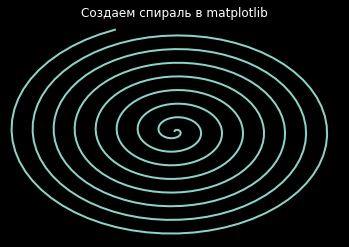

In [19]:
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import numpy as np
 
plt.style.use('dark_background')
 
fig = plt.figure()
ax = plt.axes(xlim=(-50, 50), ylim=(-50, 50))
line, = ax.plot([], [], lw=2)
 
 
# Функция инициализации.
def init():
    # создение пустого графа.
    line.set_data([], [])
    return line,
 
 
xdata, ydata = [], []
 
 
# функция анимации
def animate(i):
    t = 0.1 * i
 
    # x, y данные на графике
    x = t * np.sin(t)
    y = t * np.cos(t)
 
    # добавление новых точек в список точек осей x, y
    xdata.append(x)
    ydata.append(y)
    line.set_data(xdata, ydata)
    return line,
 
 
# Заголовок анимации
plt.title('Создаем спираль в matplotlib')
# Скрываем лишние данные
plt.axis('off')
 
# Вызов анимации.
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=500, interval=20, blit=True)
 
# Сохраняем анимацию как gif файл
anim.save('coil.gif', writer='imagemagick')

<ipython-input-21-18417002caff>:19: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()


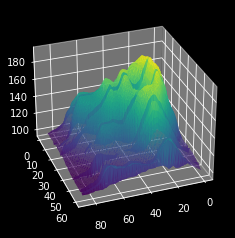

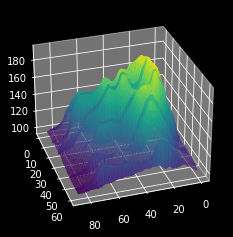

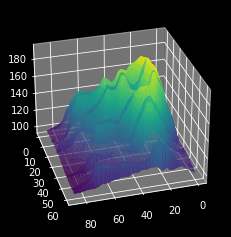

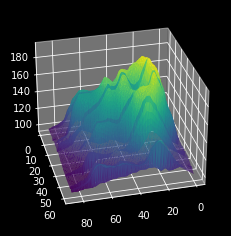

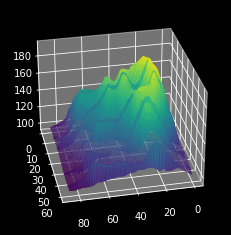

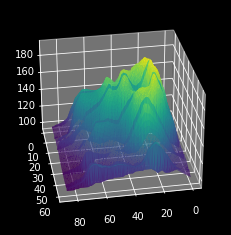

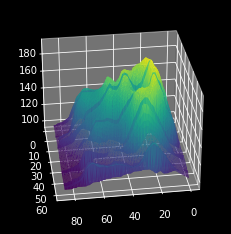

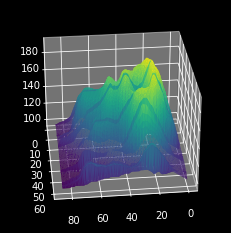

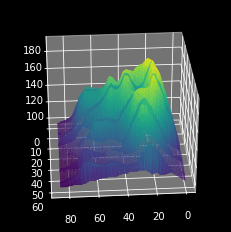

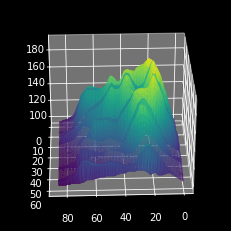

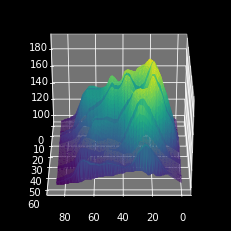

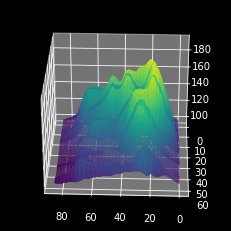

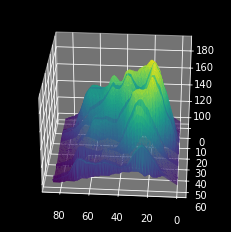

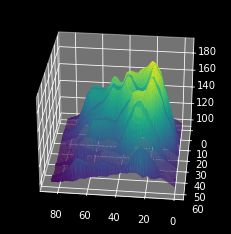

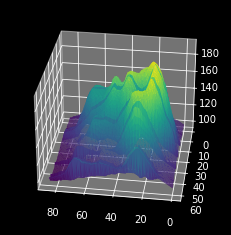

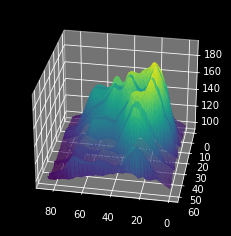

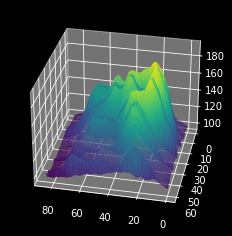

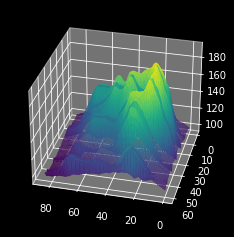

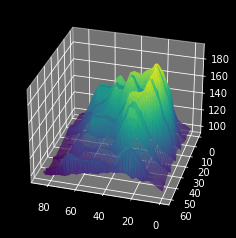

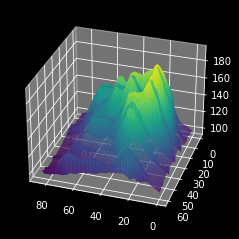

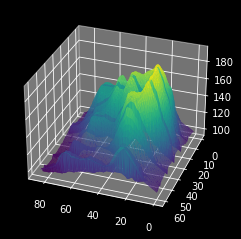

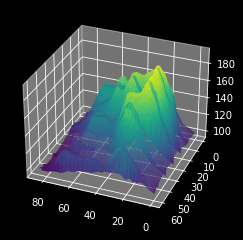

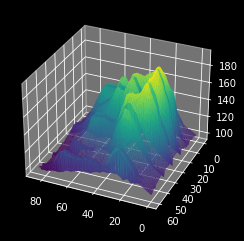

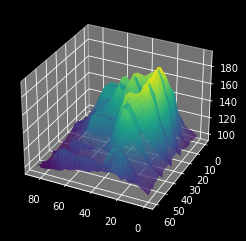

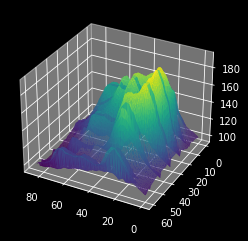

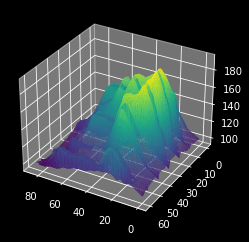

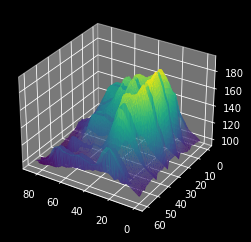

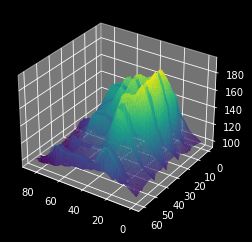

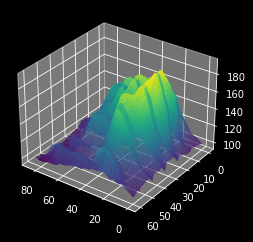

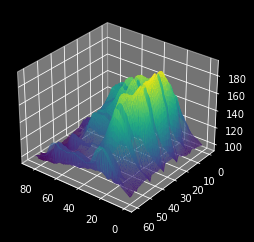

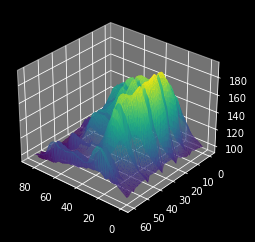

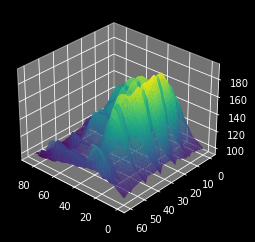

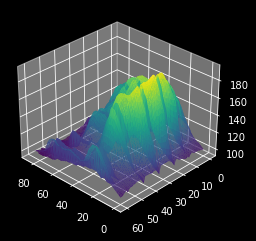

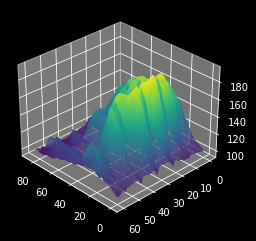

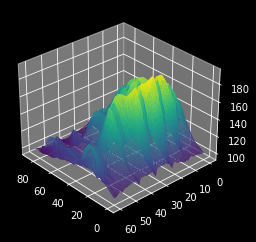

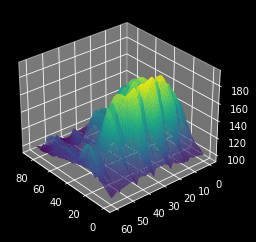

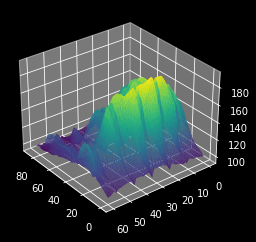

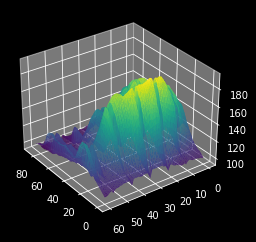

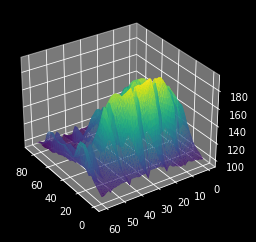

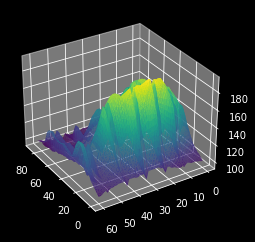

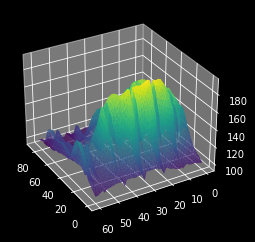

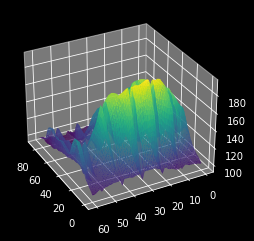

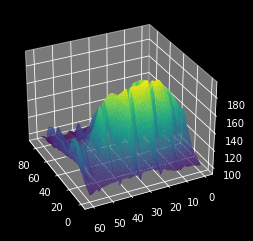

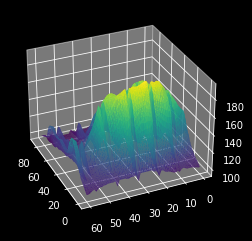

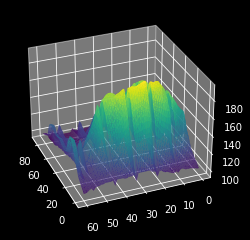

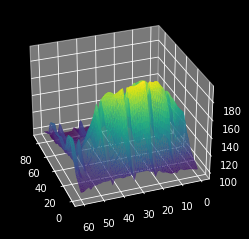

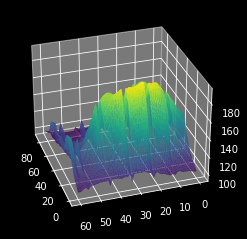

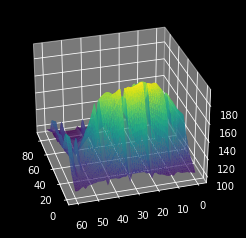

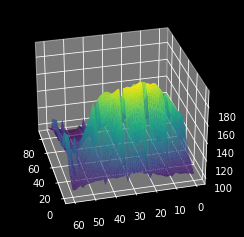

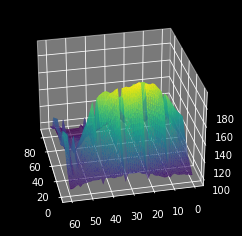

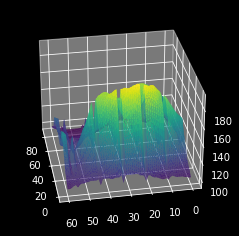

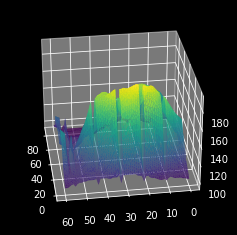

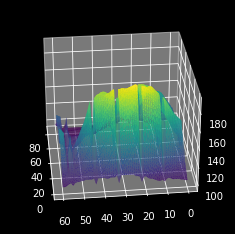

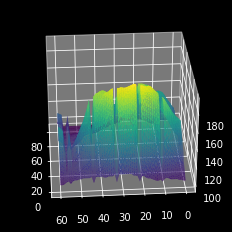

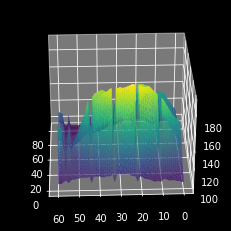

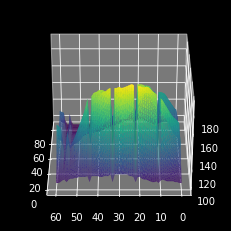

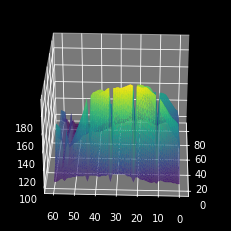

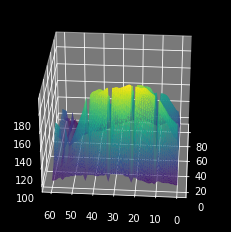

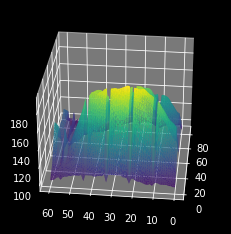

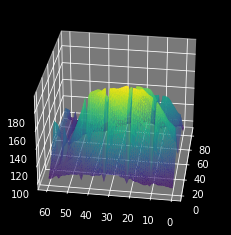

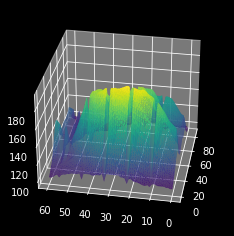

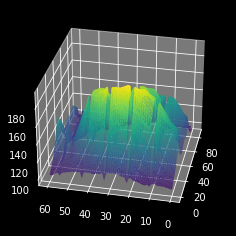

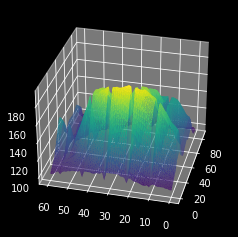

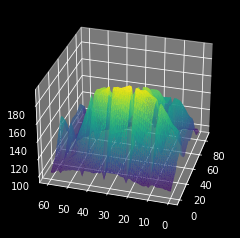

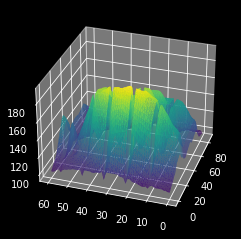

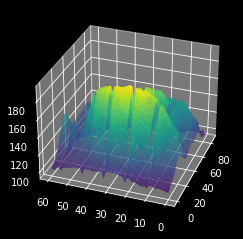

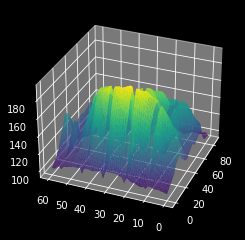

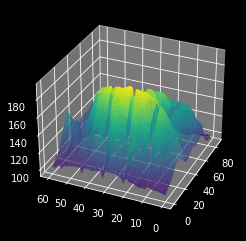

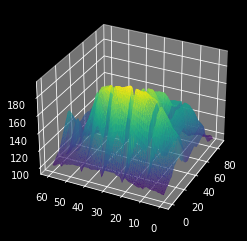

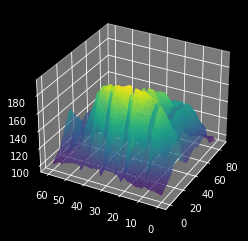

In [21]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import pandas as pd
 
# Скачиваем данные для графика.
url = 'https://python-scripts.com/wp-content/uploads/2019/3d-data.csv'
data = pd.read_csv(url)
 
# Преобразуем его в длинный формат
df = data.unstack().reset_index()
df.columns=["X", "Y", "Z"]
 
# Переименовываем старые названия столбцов в числовой формат.
df['X'] = pd.Categorical(df['X'])
df['X'] = df['X'].cat.codes
 
# Мы собираемся сделать 20 графиков, для 20 разных углов
for angle in range(70, 210, 2):
    fig = plt.figure()
    ax = fig.gca(projection='3d')
    ax.plot_trisurf(df['Y'], df['X'], df['Z'], cmap=plt.cm.viridis, linewidth=0.2)
 
    ax.view_init(30, angle)
 
    filename = 'step'+str(angle)+'.png'
    plt.savefig(filename, dpi=96)
    plt.gca()